## Import modules

In [27]:
import os
import shutil
import albumentations as A
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

from tqdm import tqdm
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from glob import glob
from albumentations.pytorch import ToTensorV2

## 디렉토리 핸들링 훈련

In [4]:
path = "G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset"
test_dir_path = os.path.join(path,'for_test')
print(test_dir_path)
os.makedirs(test_dir_path, exist_ok=True) # 없으면 만들어라 있으면 그냥 pass

G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\for_test


In [5]:
## 폴더 복사하기
img_dir_path = os.path.join(path,'train/images')

for folder_dir in glob(img_dir_path+'/*'): # glob를 이용해 해당 폴더 내부의 하위 폴더명을 따온다
    folder_name = folder_dir.split('\\')[-1] # 폴더이름만 가져온다.
    dest_folder_dir = os.path.join(test_dir_path, folder_name) # 복사할 폴더명을 원래 데이터의 이름으로 사용
    try:
        shutil.copytree(folder_dir, dest_folder_dir) # copytree(from_folder, to_folder), to_folder는 없어야 함.
    except Exception as e: # 이미 폴더가 존재할 경우 오류가 발생하므로 try~except
        print(e)
        break

[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\\for_test\\003106_female_Asian_20'


In [6]:
## 특정 폴더 이름바꿔서 다시만들기
folder_dir = glob(test_dir_path + '/*')[-1] # 딱 하나의 폴더 dir선택
print(folder_dir)
folder_name = folder_dir.split('\\')[-1]
new_folder_dir = test_dir_path + '/new_' + folder_name
try:
    shutil.copytree(folder_dir, new_folder_dir)
except Exception as e:
    print(e)
shutil.rmtree(new_folder_dir) # remove error, rmdir error, 

G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\for_test\003012_female_Asian_18


In [7]:
## 폴더 삭제
del_folder_dir = glob(test_dir_path + '/new_*')
[shutil.rmtree(dir) for dir in del_folder_dir]

[]

## transforms 연습  
* plt를 이용한 이미지 확인 방법 숙달  
* gridview 이용 숙달  
* 원하는 transform 적용후 이미지 10개의 결과 확인  


In [8]:
imgs_paths = list(glob(test_dir_path+'/*/*'))

In [9]:
img_paths_10 = imgs_paths[:10]

In [10]:
## PIL.Image.open을 사용하여 이미지를 읽어오고 np.array변환
img = np.array(Image.open(img_paths_10[0])) # 윈도우에서는 cv2.imread가 오류가 발생가능하니 Image.open사용
type(img)

numpy.ndarray

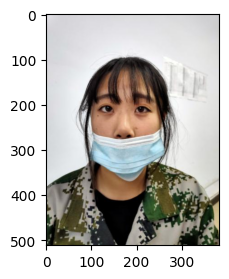

In [11]:
plt.figure(figsize=(3,3))
plt.imshow(img)

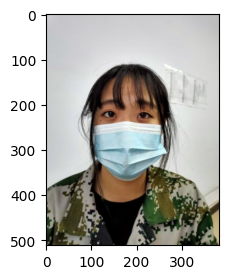

In [12]:
img = np.array(Image.open(img_paths_10[5]))
plt.figure(figsize=(3,3))
plt.imshow(img)

### grid view

In [13]:
np_imgs = [np.array(Image.open(img)) for img in img_paths_10]

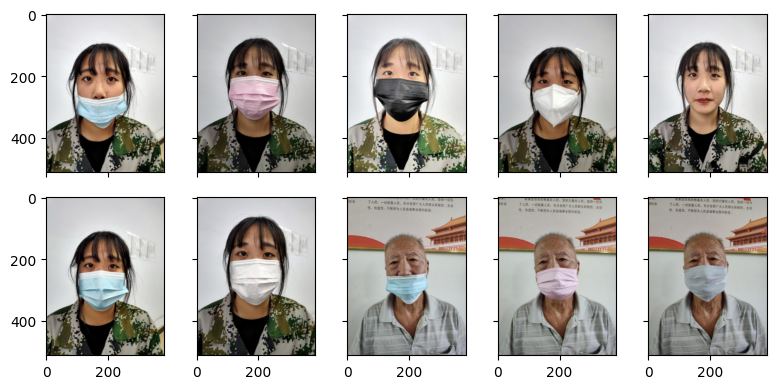

In [14]:
## grid view 만들기
## 이중 for을 이용해서 만들되 np_imgs의 index에 n_col을 곱해서 표현하자.
n_rows, n_cols = 2, 5
# 0 1 2 3 4
# 0 1
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))
for i in range(n_rows):
    for j in range(n_cols):
        axes[i][j].imshow(np_imgs[n_cols*i+j])

plt.tight_layout()

### transform

#### 적용할 transform
- CenterCrop : 배경이 차지하는 비율이 큼
- ToGray : 색상 구분 없이도, 가능할 것 같음
- Horizontal Flip : 좌우 반전
- BrightnessContrast : 밝기와 대조 변경
- Gaussian Blur : 초점 나간 경우
- GridDistortion : 얼굴의 형태를 변경시킴
- ColorJitter : 피부 톤을 변경 시킴
- Rotate : 약한 rotate

In [15]:
imgs_paths = list(glob(test_dir_path+'/*/*'))

In [16]:
random.shuffle(imgs_paths)
img_paths_10 = imgs_paths[:10]
np_imgs = [np.array(Image.open(img)) for img in img_paths_10]

In [17]:
np_imgs[0].shape

(512, 384, 3)

original size:(512, 384, 3)
transformed size:(224, 224, 3)


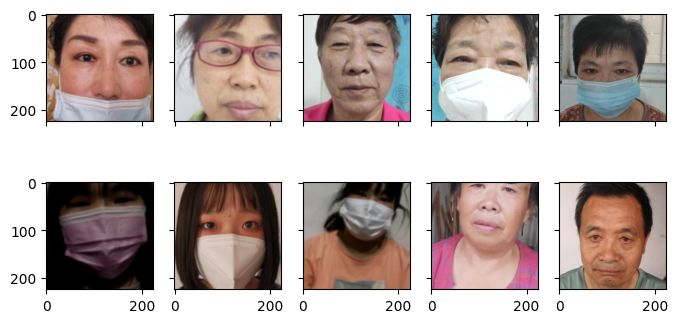

In [18]:
import albumentations as A
origin_width, origin_height, _ = np_imgs[0].shape
original_size = np_imgs[0].shape
print(f'original size:{original_size}')
transforms = A.Compose([
                        A.CenterCrop(height=224, width=224, p=1),
                        # A.ToGray(p=1),
                        A.HorizontalFlip(p=0.5),
                        A.RandomBrightnessContrast(p=0.5),
                        A.GaussianBlur(p=0.5),
                        # A.GridDistortion(p=1),
                        A.Rotate(limit=30, p=0.5)
                        ], 
                        p=1)
transformed_img_size = transforms(image = np_imgs[0])['image'].shape
print(f'transformed size:{transformed_img_size}')
n_rows, n_cols = 2, 5
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))

for i in range(n_rows):
    for j in range(n_cols):
        tmp = transforms(image = np_imgs[n_cols*i+j])['image']
        axes[i][j].imshow(transforms(image = np_imgs[n_cols*i+j])['image'])

original size:(512, 384, 3)
transformed size:(224, 224, 3)


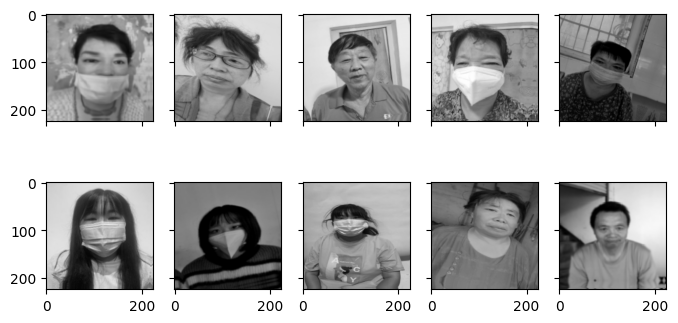

In [30]:
import albumentations as A
origin_width, origin_height, _ = np_imgs[0].shape
original_size = np_imgs[0].shape

print(f'original size:{original_size}')

transforms = A.Compose([
                        A.Resize(height=224, width=224),
                        # A.CenterCrop(height=origin_height//1, width=origin_width//2, p=1),
                        A.ToGray(p=1),
                        A.HorizontalFlip(p=0.5),
                        A.RandomBrightnessContrast(p=0.5),
                        A.GaussianBlur(p=0.5),
                        A.GridDistortion(p=1),
                        A.Rotate(limit=30, p=0.5),
                        # A.Normalize(mean=(0.56019358,0.52410121,0.501457),
                        #             std=(0.23318603,0.24300033,0.24567522)),
                        # ToTensorV2(),
                        ], 
                        p=1)

transformed_img_size = transforms(image = np_imgs[0])['image'].shape
print(f'transformed size:{transformed_img_size}')

n_rows, n_cols = 2, 5
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))

for i in range(n_rows):
    for j in range(n_cols):
        tmp = transforms(image = np_imgs[n_cols*i+j])['image']
        axes[i][j].imshow(transforms(image = np_imgs[n_cols*i+j])['image'])